# EOSC 213 — Lecture 2: Python Refresher (NumPy, Matplotlib, PyTorch Basics)

This notebook is designed for **live coding** in class.  
It focuses on the fundamentals you'll use throughout the term:

- Python basics (variables, types, functions, loops)
- **NumPy** arrays for scientific computing
- **Matplotlib** for quick visualization
- **PyTorch** tensors (as a numerical computing library (**we are not doing full-fledged deep learning in this course, but we will need this for optimization**)
- **Loops vs vectorization** (why vectorized code is much faster)
- Useful extras: broadcasting, matrix–vector products, norms, masking, basic debugging

> Tip: Run cells top-to-bottom (Kernel → Restart & Run All is a good habit).


## Disable AI Autocomplete and Chat in VS Code

For this course, please **disable all AI coding assistance** (e.g., Copilot, AI chat).

### 1. Disable GitHub Copilot
- VS Code → **Extensions**
  - macOS / Windows: `Ctrl+Shift+X`
- Search **GitHub Copilot**
- ⚙️ → **Disable** (for this workspace or globally)

### 2. Disable GitHub Copilot Chat
- Extensions → **GitHub Copilot Chat**
- ⚙️ → **Disable**

### 3. Disable built-in AI chat features
- Open **Settings**
  - **macOS:** `Cmd + ,`
  - **Windows/Linux:** `Ctrl + ,`
- Go to: `User > Features > Chat`
- Turn on **Disable AI Features**

### Check
You should no longer see ghost text, AI suggestions (autocomplete), or chat responses.

## 0. Imports and environment check

In [2]:
import sys
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import torch

#%%%
# print version of libraries
print("Numpy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Pytorch:", torch.__version__)

Numpy: 2.4.0
Matplotlib: 3.10.8
Pytorch: 2.9.1


## 1. Python basics: variables, types, lists vs arrays

In [3]:
# Variables and basic types
a = 3              # int
b = 3.0            # float
c = 2 + 5j         # complex

# print types and values
print(type(a), a)
print(type(b), b)
print(type(c), c)

# Different ways to format print output
print('a = ', a, ', b = ', b, ', c = ', c)
# f-string formatting
print(f"a = {a}, b = {b}, c = {c}")

<class 'int'> 3
<class 'float'> 3.0
<class 'complex'> (2+5j)
a =  3 , b =  3.0 , c =  (2+5j)
a = 3, b = 3.0, c = (2+5j)


In [4]:
# Python list (not a mathematical vector)
L = [1, 2, 3]
print("List:", L)
print("type of L:", type(L))
print("Length of L:", len(L))


List: [1, 2, 3]
type of L: <class 'list'>
Length of L: 3


In [5]:
# NumPy array (vector-like mathematical object)
x_np = np.array([1, 2, 3], dtype=float)
print("NumPy array:", x_np, "type:", type(x_np), "dtype:", x_np.dtype)
print("Length of x_np:", len(x_np))
print("Shape of x_np:", x_np.shape)

NumPy array: [1. 2. 3.] type: <class 'numpy.ndarray'> dtype: float64
Length of x_np: 3
Shape of x_np: (3,)


In [6]:
# The effect of multiplying a list and a numpy array by a scalar 
print(L*3)
print(x_np*3) 

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3. 6. 9.]


## 2. NumPy arrays: creation, shape, indexing, elementwise ops

In [7]:
# Create a discretized array x from 0 to 2π and compute y = sin(x)
x = np.linspace(0, 2*np.pi, 20)      # 200 points from 0 to 2π
y = np.sin(x)

print("x.shape:", x.shape, "x.ndim:", x.ndim)
print("y = ", y)
print("First 5 x:", x[:5])

x.shape: (20,) x.ndim: 1
y =  [ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]
First 5 x: [0.         0.33069396 0.66138793 0.99208189 1.32277585]


In [8]:
# Elementwise ops
y2 = y**2
z = np.sin(x) + 0.1*np.cos(5*x)

print("y2.shape:", y2.shape)

# Slicing and indexing
print("y[0]:", y[0])
print("y[10:15]:", y[10:15])

y2.shape: (20,)
y[0]: 0.0
y[10:15]: [-0.16459459 -0.47594739 -0.73572391 -0.91577333 -0.99658449]


## 3. Matplotlib quick plotting (diagnostic mindset)

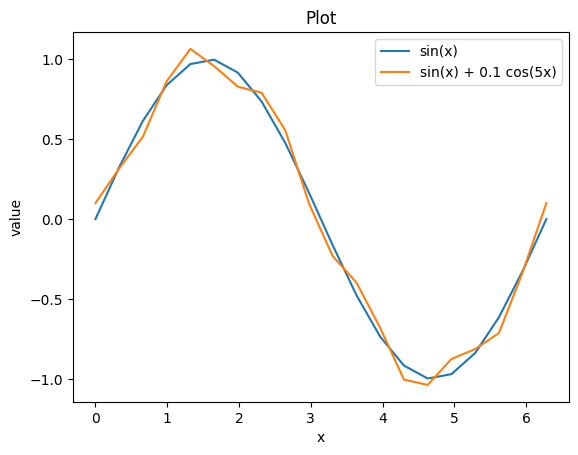

In [9]:
plt.figure()
plt.plot(x, y, label="sin(x)")
plt.plot(x, z, label="sin(x) + 0.1 cos(5x)")
plt.xlabel("x")
plt.ylabel("value")
plt.title("Plot")
plt.legend()
plt.show()


## 4. Functions: write once, use many times

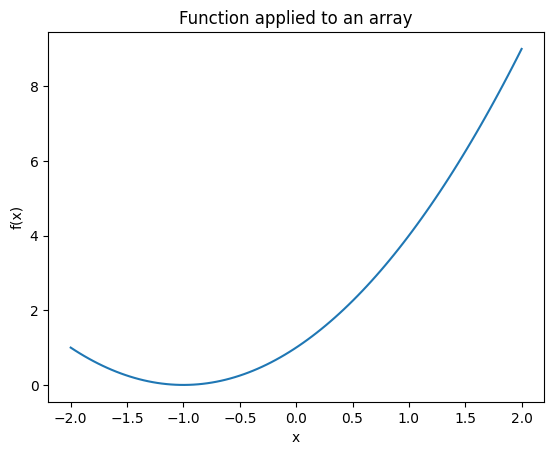

In [10]:
def f(x):
    """Example function: f(x) = x^2 + 2x + 1"""
    return x**2 + 2*x + 1

x = np.linspace(-2, 2, 100)
plt.figure()
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function applied to an array")
plt.show()


## 5. Loops vs vectorization (NumPy)

We often want to compute something like **y = x²**.  
There are two ways:

1. **Loop** over elements (slow in Python). A Python loop runs in the interpreter; overhead in every iteration
2. **Vectorize** using NumPy. Vectorized ops call optimized compiled code (C/Fortran/C++) hence faster. Better use of CPU cache and SIMD instructions (knowing the details for this is not important for this course)


In [11]:
x = np.linspace(0, 10, 1_000_000)

# Loop version
y_loop = np.zeros_like(x)
t0 = time.time()
for i in range(len(x)):
    y_loop[i] = x[i]**2
t_loop = time.time() - t0

print(f"Loop time: {t_loop:.4f} s")


Loop time: 0.1203 s


In [12]:
# Vectorized version
t0 = time.time()
y_vec = x**2
t_vec = time.time() - t0
print(f"Vectorized time:  {t_vec:.4f} s")
print("Speed up: ", t_loop/t_vec)

Vectorized time:  0.0015 s
Speed up:  78.96933667083854


## 6. PyTorch tensors: creating tensor with explicit values, dtype, shape, special tensors
### Tensor creation


In [33]:
# Tensor creation
A = torch.tensor([[1.0, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
print(A)
print(A.shape)
print(A.dtype)


# Convert Torch -> NumPy (CPU only)
A_np = A.numpy()
print("A_np type:", type(A_np), "shape:", A_np.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
torch.Size([3, 3])
torch.float32
A_np type: <class 'numpy.ndarray'> shape: (3, 3)


### Changing tensor dimensions and flattening

`unsqueeze` adds a dimension, `squeeze` removes singleton dimensions, `flatten` converts a tensor of any shape to a single dimension tensor. 

In [34]:
A = A.unsqueeze(dim=0)
print(A)
print('A.shape=', A.shape)

A = A.squeeze(dim=0)
print(A)
print('A.shape=', A.shape)

A = A.unsqueeze(-1)
print(A)
print('A.shape=', A.shape)

A = A.flatten()
print(A)
print('A.shape=', A.shape)


tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]])
A.shape= torch.Size([1, 3, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
A.shape= torch.Size([3, 3])
tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]])
A.shape= torch.Size([3, 3, 1])
tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
A.shape= torch.Size([9])


### Special tensors

Commonly used tensors initialized with zeros, ones, or random values.

In [15]:
ZeroTen = torch.zeros(2, 3, 4, 5)
OneTen  = torch.ones(2, 1, 4, 5)
RandTen = torch.randn(2, 1, 4, 5)  # standard normal
print(ZeroTen)
print(ZeroTen.shape)
print(OneTen)
print(OneTen.shape) 
print(RandTen)
print(RandTen.shape)    

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])
torch.Size([2, 3, 4, 5])
tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1

### More tensor creation and manipulation


In [50]:
# masking and indexing
K = torch.randn(5,5)
print(K)
M = torch.zeros(5,5)
M[1:4, 1:4] = 1
N = M * K 
print(N)

# compute row and column statistics
nonzero_idx = N != 0 
print(N[nonzero_idx].view(3,3))

J = N[nonzero_idx].view(3,3)
row_means = torch.mean(J, dim=1)
column_means = torch.mean(J, dim=0)

print("row means:", row_means)
print("column means:", column_means)


tensor([[ 0.1656,  1.1075, -0.4710, -1.0431,  0.1900],
        [-0.0523, -0.2674,  0.5130, -0.2418,  0.3144],
        [-2.1098,  0.9026, -1.1283, -0.6356,  1.1861],
        [-1.5569, -0.3989, -0.1407, -0.0703, -1.6403],
        [-1.3742,  2.0232, -0.3459,  0.3458,  0.2841]])
tensor([[ 0.0000,  0.0000, -0.0000, -0.0000,  0.0000],
        [-0.0000, -0.2674,  0.5130, -0.2418,  0.0000],
        [-0.0000,  0.9026, -1.1283, -0.6356,  0.0000],
        [-0.0000, -0.3989, -0.1407, -0.0703, -0.0000],
        [-0.0000,  0.0000, -0.0000,  0.0000,  0.0000]])
tensor([[-0.2674,  0.5130, -0.2418],
        [ 0.9026, -1.1283, -0.6356],
        [-0.3989, -0.1407, -0.0703]])
row means: tensor([ 0.0012, -0.2871, -0.2033])
column means: tensor([ 0.0788, -0.2520, -0.3159])


## 7. Matplotlib with PyTorch tensors

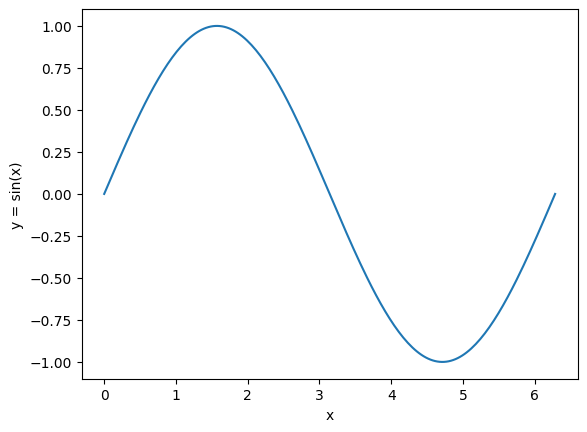

In [24]:
# Plotting tensor with matplotlib
x = torch.linspace(0, 2*math.pi, 200)
y = torch.sin(x)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.show()


## 8. Broadcasting (why vectorization works)

Broadcasting lets arrays/tensors of different shapes interact without explicit loops.

In [36]:
# Add a scalar to a tensor (performs elementwise addition)
A = torch.rand(5)
b = 3 
C = A + b 
print(A)
print(C)

tensor([0.5957, 0.4497, 0.9585, 0.3794, 0.4285])
tensor([3.5957, 3.4497, 3.9585, 3.3794, 3.4285])


In [41]:
A = torch.rand(4, 3)
b = torch.tensor([1.0, 2.0, 3.0])   # shape (3,)
C = A + b                           # b is broadcast across rows

print("A.shape:", A.shape)
print("b.shape:", b.shape)
print("C.shape:", C.shape)
print("First row A:", A[0])
print("First row C:", C[0])
print("A = ", A)
print("b = ", b)
print("C = ", C)


A.shape: torch.Size([4, 3])
b.shape: torch.Size([3])
C.shape: torch.Size([4, 3])
First row A: tensor([0.7488, 0.7793, 0.4313])
First row C: tensor([1.7488, 2.7793, 3.4313])
A =  tensor([[0.7488, 0.7793, 0.4313],
        [0.8488, 0.1336, 0.3408],
        [0.2213, 0.0531, 0.1026],
        [0.6727, 0.6182, 0.9580]])
b =  tensor([1., 2., 3.])
C =  tensor([[1.7488, 2.7793, 3.4313],
        [1.8488, 2.1336, 3.3408],
        [1.2213, 2.0531, 3.1026],
        [1.6727, 2.6182, 3.9580]])


## 9. Matrix–vector multiplication (preview of linear algebra in the course)

In [ ]:
A = torch.randn(4, 4)
x = torch.randn(4)

y = A @ x   # matrix-vector product
print("A.shape:", A.shape)
print("x.shape:", x.shape)
print("y.shape:", y.shape)


## 10. Reductions: sum, mean, norm (used for error/residuals)

In [44]:
x = torch.linspace(1, 10, 20)

print("sum:", torch.sum(x).item())
print("mean:", torch.mean(x).item())


sum: 110.0
mean: 5.5


## 11. Boolean masks (indexing subsets without loops)

In [45]:
x = torch.linspace(-2, 2, 21)
mask = x > 0
print("x:", x)
print("mask:", mask)
print("x[mask]:", x[mask])


x: tensor([-2.0000e+00, -1.8000e+00, -1.6000e+00, -1.4000e+00, -1.2000e+00,
        -1.0000e+00, -8.0000e-01, -6.0000e-01, -4.0000e-01, -2.0000e-01,
        -2.9802e-08,  2.0000e-01,  4.0000e-01,  6.0000e-01,  8.0000e-01,
         1.0000e+00,  1.2000e+00,  1.4000e+00,  1.6000e+00,  1.8000e+00,
         2.0000e+00])
mask: tensor([False, False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])
x[mask]: tensor([0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000, 1.8000,
        2.0000])


## 12. Loops vs vectorization (PyTorch) + timing

Same story as NumPy: **avoid Python loops** when operating on arrays/tensors.

We’ll time a simple operation: **y = sin(x) + x²**.


In [25]:
x = torch.linspace(0, 10, 1_000_000)

# Loop version
y_loop = torch.zeros_like(x)
t0 = time.time()
for i in range(len(x)):
    y_loop[i] = torch.sin(x[i]) + x[i]**2
t_loop = time.time() - t0

print(f"Loop time: {t_loop:.4f} s")

Loop time: 4.0434 s


In [27]:
# Vectorized version
t0 = time.time()
y_vec = torch.sin(x) + x**2
t_vec = time.time() - t0

print(f"Vectorized time: {t_vec:.4f} s")
print(f"Speedup: {t_loop/t_vec:.1f}x")

Vectorized time: 0.0024 s
Speedup: 1699.7x


## 13. Creating grids with meshgrid


In [29]:
x = torch.arange(4)
y = torch.arange(5)

X, Y = torch.meshgrid(x, y, indexing="ij")

print("X =", X)
print("Y =", Y)


X = tensor([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]])
Y = tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


## 14. Elementwise operations on grids
### Elementwise operations


In [32]:
Z1 = X * Y
Z2 = (X**2) * Y
Z3 = torch.sin(X) * torch.cos(Y)
Z4 = torch.abs(X)

print("Z1 =", Z1)
print("Z2 =", Z2)
print("Z3 =", Z3)   
print("Z4 =", Z4)


Z1 = tensor([[ 0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4],
        [ 0,  2,  4,  6,  8],
        [ 0,  3,  6,  9, 12]])
Z2 = tensor([[ 0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4],
        [ 0,  4,  8, 12, 16],
        [ 0,  9, 18, 27, 36]])
Z3 = tensor([[ 0.0000,  0.0000, -0.0000, -0.0000, -0.0000],
        [ 0.8415,  0.4546, -0.3502, -0.8330, -0.5500],
        [ 0.9093,  0.4913, -0.3784, -0.9002, -0.5944],
        [ 0.1411,  0.0762, -0.0587, -0.1397, -0.0922]])
Z4 = tensor([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]])


Text(0.5, 1.0, 'Z4 = |X|')

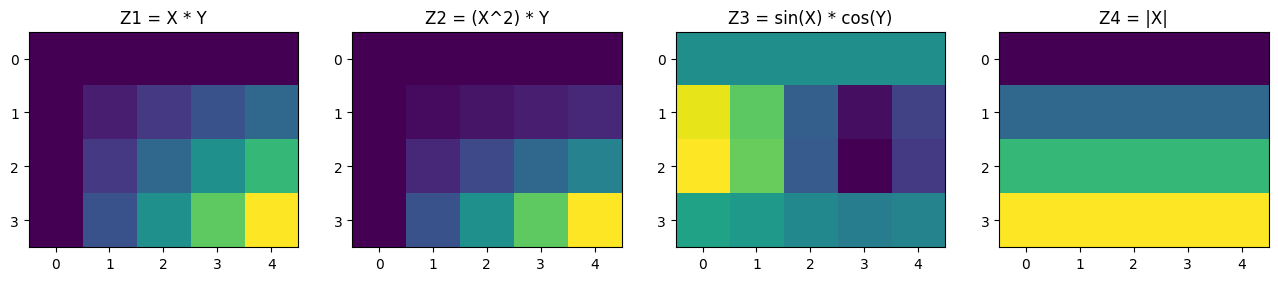

In [34]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
ax[0].imshow(Z1.numpy())
ax[0].set_title("Z1 = X * Y")
ax[1].imshow(Z2.numpy())
ax[1].set_title("Z2 = (X^2) * Y")
ax[2].imshow(Z3.numpy())
ax[2].set_title("Z3 = sin(X) * cos(Y)")
ax[3].imshow(Z4.numpy())
ax[3].set_title("Z4 = |X|")

## Summary: What you should be comfortable with after Lecture 2

By the end of this lecture, you should be able to:

- Create and manipulate **PyTorch tensors** of different shapes and dimensions
- Understand and reason about **tensor shapes** and indexing
- Define mathematical functions and **evaluate them over arrays/tensors**
- Use **logical masks** to select subsets of data and compute statistics on them
- Perform **elementwise operations** and basic reductions (mean, sum, norm)
- Generate **structured grids** using `meshgrid`
- Plot results using Matplotlib to **diagnose and understand computations**
- Recognize why **vectorized operations** are preferred over explicit Python loops

These skills form the computational foundation for the rest of the course, where we will apply them to:
- numerical solutions of differential equations,
- simulations,
- stability analysis,
- and inverse problems.

## Some good habits while coding (you will thank yourself later)

- Label axes on every plot
- Use small functions instead of copy–paste sections of codes multiple times 
- Check array/tensor shapes frequently (`.shape`, `.ndim`)
- Write clean, readable code  
  *(grading includes clarity, not only correctness)*

**Takeaway:** scientific computing is as much about habits as it is about syntax.